In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bernouli_sample(p):
    while True:
        proba = np.random.rand(p)
        values = (proba < 0.5).astype(int) * 2 - 1
        yield values

spg = bernouli_sample(2)
next(spg)

array([-1, -1])

In [170]:
def loss_7p1(theta):
    return 2 * theta[0]**2 + theta[1]**2

def approx_gradient(loss, perturb, theta, c):
    diff = loss(theta + c * perturb) - loss(theta - c * perturb)
    return (diff / (2 * c)) / perturb

def grad_step(theta, a, grad):
    return theta - a * grad

theta_0 = np.array([1, 1])
a0 = 0.1
c0 = 1.0

theta = theta_0
for perturb, i in zip(bernouli_sample(2), range(100)):
    grad = approx_gradient(loss_7p1, perturb, theta, c0)
    theta = grad_step(theta, a0, grad)
    print(theta)



[0.8 1.2]
[0.72 1.28]
[0.176 0.736]
[-0.0416  0.5184]
[-0.12864  0.43136]
[-0.163456  0.396544]
[-0.0187648  0.2518528]
[-0.06162944  0.20898816]
[0.00481997 0.14253875]
[0.03139973 0.11595899]
[0.04203164 0.10532708]
[0.0462844  0.10107432]
[0.0479855  0.09937322]
[0.04866595 0.09869277]
[0.00946101 0.05948784]
[0.01757418 0.05137468]
[0.02081944 0.04812941]
[0.00286578 0.03017575]
[0.00775462 0.02528692]
[-0.00040461  0.01712768]
[0.00318277 0.0135403 ]
[0.00461772 0.01210535]
[0.0051917  0.01153137]
[0.00080875 0.00714841]
[0.00191493 0.00604223]
[0.00235741 0.00559976]
[0.00029449 0.00353684]
[-0.00053067  0.00271168]
[-0.00086074  0.00238161]
[-0.00099277  0.00224959]
[-0.00014574  0.00140256]
[-0.00036796  0.00118035]
[-0.00045684  0.00109146]
[-5.58143766e-05  6.90430780e-04]
[0.0001046  0.00053002]
[-4.32452566e-05  3.82176086e-04]
[5.04880633e-05 2.88442766e-04]
[8.79813913e-05 2.50949439e-04]
[2.59894707e-06 1.65566994e-04]
[-3.15540306e-05  1.31414017e-04]
[-4.52152217e-05  

In [23]:
np.prod(1/np.ones(10))

1.0

In [39]:
def loss_7p14(theta):
    return theta @ np.arange(1, len(theta) + 1) + np.prod(1/theta)

In [196]:

P = 10
theta_0 = np.ones(P)
a0 = 0.002
c0 = np.arange(1, P + 1) * 0.01 + .1

theta = theta_0
losses = []
theta_diffs = []
theta_history = []
for perturb, i in zip(bernouli_sample(P), range(100000)):
    # a = max(.001, np.random.standard_normal() * a0/4 + a0)
    # c = max(.001, np.random.standard_normal() * c0/4 + c0)
    a = a0
    c = c0
    if i > 10000:
        c = c0 / 2
    if i > 30000:
        a = a0 / 2
    if i > 40000:
        c /= 2
    loss = loss_7p14(theta)
    theta_history.append(theta)
    print(f"{i}: {loss}")
    grad = approx_gradient(loss_7p14, perturb, theta, c)

    theta = grad_step(theta, a, grad)
    theta = np.maximum(theta, np.ones(P) * .01)
    theta_mean = np.array(theta_history[-20:]).mean(axis=0)
    theta_history = theta_history[-100:]
    diff = theta_mean - theta
    theta_diffs.append(np.sqrt(diff @ diff))
    
    losses.append(loss)



0: 56.0
1: 55.99234212940481
2: 55.67993515592155
3: 54.99539175245785
4: 54.60657662947765
5: 54.48415984538664
6: 54.22117775378804
7: 54.093544165408254
8: 54.02669960894158
9: 53.71332644220218
10: 53.09377089666478
11: 53.076997421978135
12: 51.76191043981128
13: 51.784584279398246
14: 51.4593632345044
15: 51.09488626357861
16: 51.09082488146573
17: 51.05034092494397
18: 51.032182017833975
19: 50.90146675346718
20: 50.009799226285615
21: 49.68925886929546
22: 49.64083736718438
23: 49.13293334536587
24: 49.03776459331814
25: 49.026273143285856
26: 49.02909328828388
27: 49.01872567669483
28: 48.947906478619444
29: 48.95519053944122
30: 48.955060822004754
31: 48.68334100319775
32: 48.68153116323489
33: 48.52238182186869
34: 48.52048670127545
35: 48.500081924313
36: 48.490144547810516
37: 48.41689027745673
38: 48.34660134592231
39: 48.33875666688768
40: 48.27052096189768
41: 48.269365184037916
42: 48.150709406067094
43: 48.06964235466369
44: 47.85847121663171
45: 47.686046365521406
46

In [191]:
theta

array([3.9514771 , 1.97406125, 1.31769366, 0.98952163, 0.79086024,
       0.65932351, 0.56453949, 0.49368001, 0.4393029 , 0.39601757])

In [192]:
loss_7p14(theta)

43.42499798688231

In [193]:
np.argmin(losses)

70543

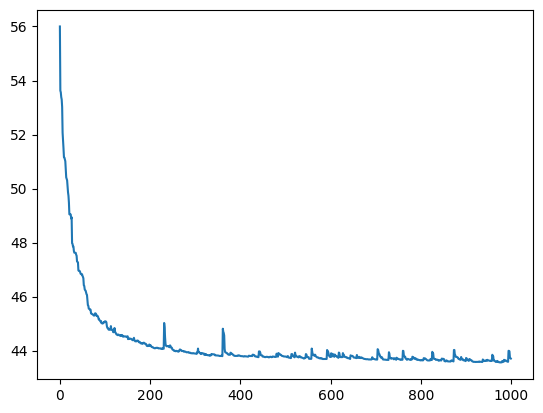

In [189]:
plt.plot(losses)
# plt.xscale('log')

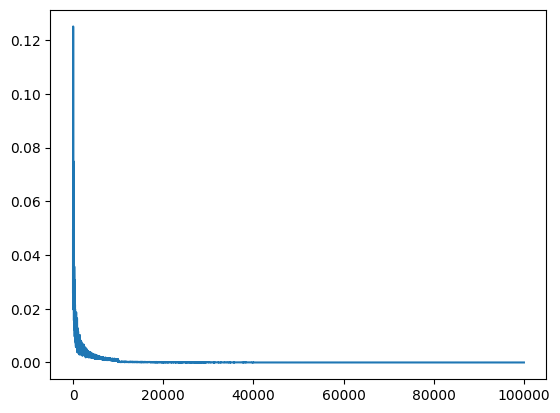

In [166]:
plt.plot(theta_diffs)